<strong><b><font size="5">Data Science in Sports - Web Scraping and Statistical Analysis in NBA Data</font></b></strong>

## Problem Definition

Data science is everywhere. If data is available, we can extract, analyze and generate powerful insights. And in sport it would be no different.

More and more managers in all sports are discovering the benefits and competitive advantage of using data analysis to understand athletes' behavior, improve performance, unite athletes with complementary characteristics in the same team and much more.

In this Lab, we will extract real data from NBA athletes - the North American Basketball League - and analyze the data.

## Data source

Our source of data will be the <a href="https://www.basketball-reference.com"> Bastketball Reference </a> which maintains all the details and statistics about the NBA.

## Loading the Used Packages on This Jupyter Notebook

In [1]:
# Python Version
from platform import python_version
print('Python Language Version Used In This Jupyter Notebook:', python_version())

Python Language Version Used In This Jupyter Notebook: 3.8.3


<strong><b><font size="4">Data Science in Sports - Web Scraping and Statistical Analysis in NBA Data</font></b></strong>

In [2]:
# Pingouin Package
!pip install -q -U pingouin

In [3]:
# Imports

# Imports for Web Scraping
import bs4
import csv 
import requests 
from bs4 import BeautifulSoup

# Imports for data manipulation, visualization and analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

## Web Scraping

In [4]:
# We created a file to save the result of the web scraping
archive = csv.writer(open('nba.csv', 'w', encoding = "utf-8")) 

In [5]:
# Fazemos requisição à página web com os dados do nosso interesse, nesse caso temporada 2019/2020
page = requests.get("https://www.basketball-reference.com/leagues/NBA_2020_per_game.html")

In [6]:
# Requisição 200 indica sucesso na conexão
page

<Response [200]>

## Visualizamos o conteúdo da pagina:

In [7]:
# View the data
page.text

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/bbr/build" itemscope itemtype="https://schema.org/WebSite" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://d2p3bygnnzw9w3.cloudfront.net/req/202012013" />\n\n    <title>2019-20 NBA Player Stats: Per Game | Basketball-Reference.com</title>\n\n    \n    \n    <meta name="Description" content="Player stat per game averages for the 2019-20 NBA season">\n    <link rel="canonical" href="https://www.basketball-reference.com/leagues/NBA_2020_per_game.html" />\n\n<!-- include:start ="/inc/klecko_header_bbr.html_f" -->\n<!-- no:cookie fast load the css.           -->\n<script>function gup(n) {n = n.replace(/[\\[]/, \'\\\\[\').replace(/[\\]]/, \'\\\\]\'); var r = new RegExp(\'[\\\\?&]\'+n+\'=([^&#]*)\'); var re = r.exec(l

In [8]:
# Let's parse the HTML page to format the text
soup = BeautifulSoup(page.text, 'html.parser')

In [9]:
# View the document now in the HTML standard (page source code)
soup


<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202012013" rel="dns-prefetch"/>
<title>2019-20 NBA Player Stats: Per Game | Basketball-Reference.com</title>
<meta content="Player stat per game averages for the 2019-20 NBA season" name="Description"/>
<link href="https://www.basketball-reference.com/leagues/NBA_2020_per_game.html" rel="canonical"/>
<!-- include:start ="/inc/klecko_header_bbr.html_f" -->
<!-- no:cookie fast load the css.           -->
<script>function gup(n) {n = n.replace(/[\[]/, '\\[').replace(/[\]]/, '\\]'); var r = new RegExp('[\\?&]'+n+'=([^&#]*)'); var re = r.exec(location.search);   return re === null?'':decodeURIComponent(re[1].replace(

But the data that interests us is in a div tag, class of type table_container. Let's search and then extract the data.

In [10]:
# Search by tag and class on the HTML page
table = soup.find("div", {"class": "overthrow table_container"})

In [11]:
# Visualiza os dados
table

<div class="overthrow table_container" id="div_per_game_stats">
<table class="sortable stats_table" data-cols-to-freeze="2" data-non-qual="1" data-qual-label=" When table is sorted, hide non-qualifiers for rate stats" data-qual-text="" id="per_game_stats"><caption>Player Per Game Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
<th aria-label="Player" class="poptip sort_default_asc center" data-stat="player" scope="col">Player</th>
<th aria-label="Position" class="poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>
<th aria-label="Player's age on February 1 of the season" class="poptip sort_default_asc center" data-stat="age

We are almost there. In the table, we search for the term thead in order to extract the "head" from the table, that is, the header.

In [12]:
# Extract the table header (title of each column) and save it in the file
header = table.find("thead")
header_elements = header.find_all("th")
header_elements = [head.text for head in header_elements[1:]]
archive.writerow(header_elements)

111

In [13]:
# Visualiza os dados
header

<thead>
<tr>
<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
<th aria-label="Player" class="poptip sort_default_asc center" data-stat="player" scope="col">Player</th>
<th aria-label="Position" class="poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>
<th aria-label="Player's age on February 1 of the season" class="poptip sort_default_asc center" data-stat="age" data-tip="Player's age on February 1 of the season" scope="col">Age</th>
<th aria-label="Team" class="poptip sort_default_asc center" data-stat="team_id" data-tip="Team" scope="col">Tm</th>
<th aria-label="Games" class="poptip center" data-stat="g" data-tip="Games" scope="col">G</th>
<th aria-label="Games Started" class="poptip center" data-stat="gs" data-tip="Games Started" scope="col">GS</th>
<th aria-label="Minutes Played Per Game" class="poptip hide_non_quals center" data-stat="mp_per_g" 

We can then extract the elements from each line. We searched for the tag tr and class full_tabel.

In [14]:
# Extract elements from each table row
line_elements = table.find_all("tr", {"class": "full_table"})

In [15]:
# We now have each tr tag, which indicates table rows
line_elements

[<tr class="full_table"><th class="right" csk="1" data-stat="ranker" scope="row">1</th><td class="left" csk="Adams,Steven" data-append-csv="adamsst01" data-stat="player"><a href="/players/a/adamsst01.html">Steven Adams</a></td><td class="center" data-stat="pos">C</td><td class="right" data-stat="age">26</td><td class="left" data-stat="team_id"><a href="/teams/OKC/2020.html">OKC</a></td><td class="right" data-stat="g">63</td><td class="right" data-stat="gs">63</td><td class="right" data-stat="mp_per_g">26.7</td><td class="right" data-stat="fg_per_g">4.5</td><td class="right" data-stat="fga_per_g">7.6</td><td class="right" data-stat="fg_pct">.592</td><td class="right iz" data-stat="fg3_per_g">0.0</td><td class="right iz" data-stat="fg3a_per_g">0.0</td><td class="right non_qual" data-stat="fg3_pct">.333</td><td class="right" data-stat="fg2_per_g">4.5</td><td class="right" data-stat="fg2a_per_g">7.5</td><td class="right" data-stat="fg2_pct">.594</td><td class="right" data-stat="efg_pct">.5

In [16]:
# We extract the contents of each line and write to the file on disk
for row in line_elements:
    data_elements = row.find_all("td")
    data_elements = [data.text for data in data_elements]
    archive.writerow(data_elements)

Web Scraping completed. Let's analyze the data.

## Loading and Analyzing Data

In [17]:
# Load the csv file with the web scraping content
df_nba = pd.read_csv('nba.csv')

In [18]:
# Shape
df_nba.shape

(510, 29)

In [19]:
# View a sample of the data
df_nba.head()

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0              Steven Adams   C   26  OKC  63  63  26.7  4.5   7.6  0.592   
1               Bam Adebayo  PF   22  MIA  72  72  33.6  6.1  11.0  0.557   
2         LaMarcus Aldridge   C   34  SAS  53  53  33.1  7.4  15.0  0.493   
3            Kyle Alexander   C   23  MIA   2   0   6.5  0.5   1.0  0.500   
4  Nickeil Alexander-Walker  SG   21  NOP  47   1  12.6  2.1   5.7  0.368   

   ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  ...  0.582  3.3  6.0   9.3  2.3  0.8  1.1  1.5  1.9  10.9  
1  ...  0.691  2.4  7.8  10.2  5.1  1.1  1.3  2.8  2.5  15.9  
2  ...  0.827  1.9  5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3  ...    NaN  1.0  0.5   1.5  0.0  0.0  0.0  0.5  0.5   1.0  
4  ...  0.676  0.2  1.6   1.8  1.9  0.4  0.2  1.1  1.2   5.7  

[5 rows x 29 columns]

** Data Dictionary ** (as shown in the data source):

- Rk -- Rank
- Pos -- Position
- Age -- Player's age on February 1 of the season
- Tm -- Team
- G -- Games
- GS -- Games Started
- MP -- Minutes Played Per Game
- FG -- Field Goals Per Game
- FGA -- Field Goal Attempts Per Game
- FG% -- Field Goal Percentage
- 3P -- 3-Point Field Goals Per Game
- 3PA -- 3-Point Field Goal Attempts Per Game
- 3P% -- 3-Point Field Goal Percentage
- 2P -- 2-Point Field Goals Per Game
- 2PA -- 2-Point Field Goal Attempts Per Game
- 2P% -- 2-Point Field Goal Percentage
- eFG% -- Effective Field Goal Percentage

This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.

- FT -- Free Throws Per Game
- FTA -- Free Throw Attempts Per Game
- FT% -- Free Throw Percentage
- ORB -- Offensive Rebounds Per Game
- DRB -- Defensive Rebounds Per Game
- TRB -- Total Rebounds Per Game
- AST -- Assists Per Game
- STL -- Steals Per Game
- BLK -- Blocks Per Game
- TOV -- Turnovers Per Game
- PF -- Personal Fouls Per Game
- PTS -- Points Per Game

### What is the average age of the players who played in the 2019/2020 NBA season?

In [20]:
# Average age of players
df_nba['Age'].mean()

25.58235294117647

The average age was 25 years. Let's create a histogram and analyze the distribution of the age variable.

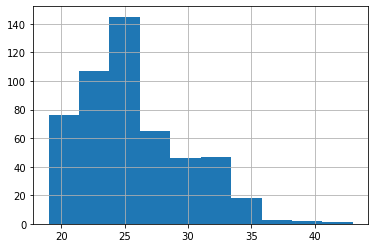

In [22]:
# Histogram
df_nba['Age'].hist()

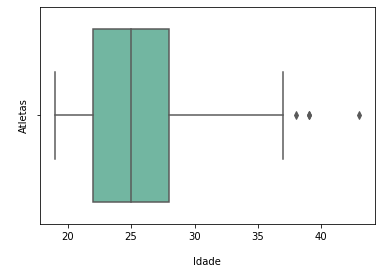

In [23]:
# BoxPlot
ax = sns.boxplot(x = df_nba['Age'], palette = "Set2", orient = "h")
plt.ylabel('\nAtletas')
plt.xlabel('\nIdade')
plt.show()

Clearly the average age of athletes is 25 years old. And notice that we have some outliers. Does the age variable follow a normal distribution? Let's check.

In [25]:
# Pingouin normality test
x = df_nba['Age']
pg.normality(x)

W          pval  normal
Age  0.949573  3.581048e-12   False

### Who are the players with the most points per game? Select the Top 10.

In [26]:
# Grouping data by player and total points
df_nba_top10 = df_nba.groupby(['Player'])['PTS'].sum().reset_index().rename(columns = {'PTS': 'Total_Points'})

In [27]:
# Retornamos os Top 10
df_nba_top10 = df_nba_top10.nlargest(10, 'Total_Points')

In [28]:
# Visualiza os dados
df_nba_top10

Player  Total_Points
213           James Harden          34.3
41            Bradley Beal          30.5
87          Damian Lillard          30.0
173  Giannis Antetokounmpo          29.5
322            Luka Dončić          28.8
309           Kyrie Irving          27.4
423      Russell Westbrook          27.2
279          Kawhi Leonard          27.1
120           Devin Booker          26.6
278     Karl-Anthony Towns          26.5

### How many games have players aged 35 years or older started (variable GS)?

In [29]:
# Function
def list_players35():
    print('\nPlayers aged 35 and over and games played.\n')
    print('Players:          | Games:')
    print('------------------+--------')
    for index, row in df_nba.iterrows():
        if row['Age'] >= 35:
            print('{:<17} | {:>6}'.format(row['Player'], row['GS']))

In [31]:
# Executa a função
list_players35()


Players aged 35 and over and games played.

Players:          | Games:
------------------+--------
Carmelo Anthony   |     58
J.J. Barea        |      6
Vince Carter      |      0
Tyson Chandler    |      5
Jamal Crawford    |      0
Marc Gasol        |     43
Udonis Haslem     |      1
Andre Iguodala    |      0
LeBron James      |     67
Kyle Korver       |      1
J.J. Redick       |     36
Thabo Sefolosha   |      0


### Chart showing the relationship between offensive rebounds and minutes played.
What can we conclude from the graph?

In [32]:
# function
    
def generates_offensive_receiver_graphic():
    plt.figure(figsize = [10,10])
    sns.set()
    sns.regplot(x = df_nba['MP'], y = df_nba['ORB'], color = '#AA2F2F', marker = '+')
    plt.xlabel('\nMinutes Played (per game)\n', fontsize = 14, color = 'black')
    plt.ylabel('\nOffensive Rebounds (per game)\n', fontsize = 14, color = 'black')
    plt.title('\nMinutes Played vs. Offensive Rebounds\n', fontsize = 20)
    plt.show()

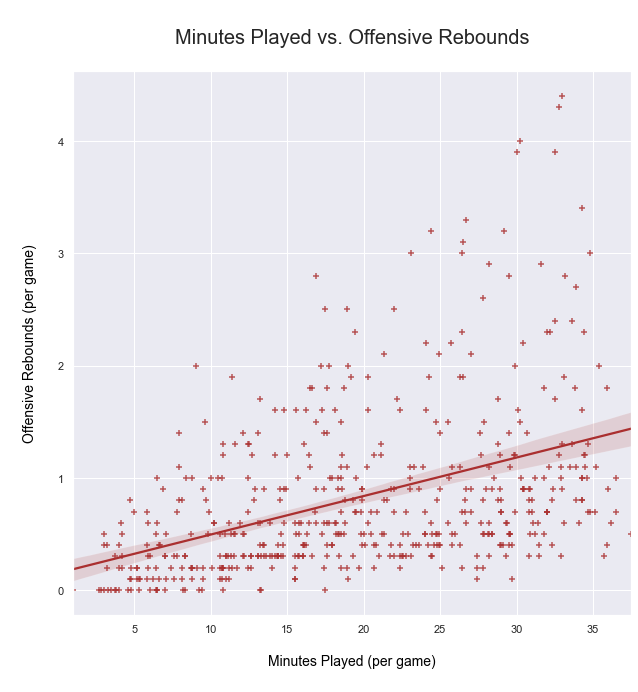

In [33]:
# Executa a função
generates_offensive_receiver_graphic()

The dispersion of data increases as the number of minutes played increases. That is, with players more tired at the end of the game it is more difficult to make offensive rebounds.



### Chart showing the relationship between defensive rebounds and minutes playe

What can we conclude from the graph?

In [41]:
# function

def generates_defensive_receiver_graphic():
    plt.figure(figsize = [10,10])
    sns.set()
    sns.regplot(x = df_nba['MP'], y = df_nba['DRB'], color = '#F244AA', marker = '*')
    plt.xlabel('\nMinutes Played (per game)\n', fontsize = 14, color = 'black')
    plt.ylabel('\nDefensive Rebounds (per game)\n', fontsize = 14, color = 'black')
    plt.title('\nMinutes Played x Defensive Rebounds\n', fontsize = 20)
    plt.show()
    
    
 

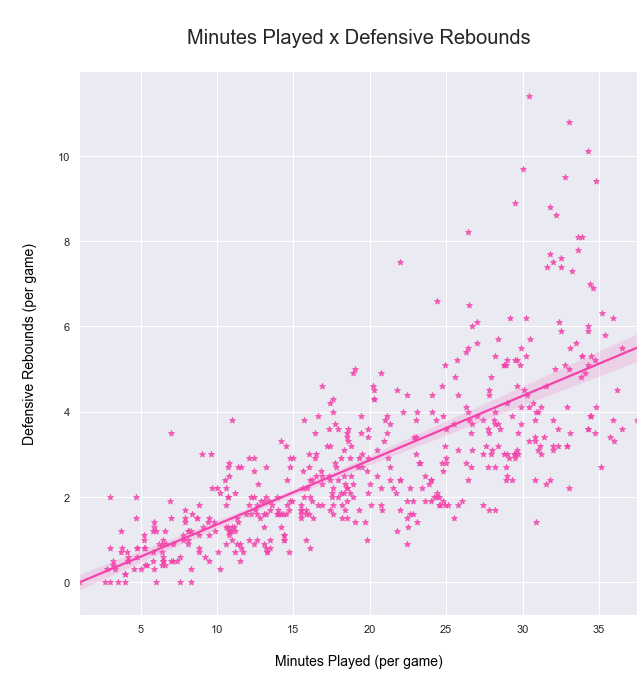

In [43]:
# Executa a função
generates_defensive_receiver_graphic()

The behavior of defensive rebounds follows a different pattern from offensive rebounds. Towards the end of the game, the teams itemize their defenses and, consequently, the number of defensive rebounds increases.